# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using the used car vehicles dataset, our goal is to predict data with a supervised regression model that will demonstrate how its features influcence the price of a used car. Price will be the dependent variable and other features such as make, model, year, mileage, condition, fuel type, and location will be dependent variables which will help to train our model.  The final result will provide insights in the influence of the different features on the price of the used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


To gain a better understanding of the dataset, we will begin by conducting an exploratory data analysis. This includes using methods such as .info() to review data types and missing values, and .describe() to summarize statistical properties of numerical variables. We'll also inspect the distribution and range of key features through visualizations such as histograms, boxplots, and scatterplots.

During this process, we will identify:

* Potential data quality issues, such as missing values, outliers, or inconsistent formatting

* Irrelevant or low-variance features that may not contribute to the price prediction

* Correlations or relationships between independent variables and the target variable (price)

In [123]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings

#from statsmodels.datasets import nible
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

In [124]:
#Column: price |  Null Percentage: 0.0 %
#Column: year |  Null Percentage: 0.28 %
#Column: manufacturer |  Null Percentage: 4.13 %
#Column: model |  Null Percentage: 1.24 %
#Column: condition |  Null Percentage: 40.79 %
#Column: cylinders |  Null Percentage: 41.62 %
#Column: fuel |  Null Percentage: 0.71 %
#Column: odometer |  Null Percentage: 1.03 %
#Column: title_status |  Null Percentage: 1.93 %
#Column: transmission |  Null Percentage: 0.6 %
#Column: VIN |  Null Percentage: 37.73 %
#Column: drive |  Null Percentage: 30.59 %
#Column: size |  Null Percentage: 71.77 %
#Column: type |  Null Percentage: 21.75 %
#Column: paint_color |  Null Percentage: 30.5 %
#Column: state |  Null Percentage: 0.0 %

In [125]:
vehicles_df = pd.read_csv('data/vehicles.csv')

vehicles_df.describe()

vehicles_df.info()
print ("==================================================")
for column in vehicles_df.columns:
    non_null_count = vehicles_df[column].count()
    total_count = len(vehicles_df)
    null_count = total_count - non_null_count
    null_percentage = round((null_count/total_count)*100,2)
    print(f"Column: {column} |  Null Percentage: {null_percentage} %")

vehicles_df['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [126]:
vehicles_df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [127]:
vehicles_df["model"].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

<Axes: >

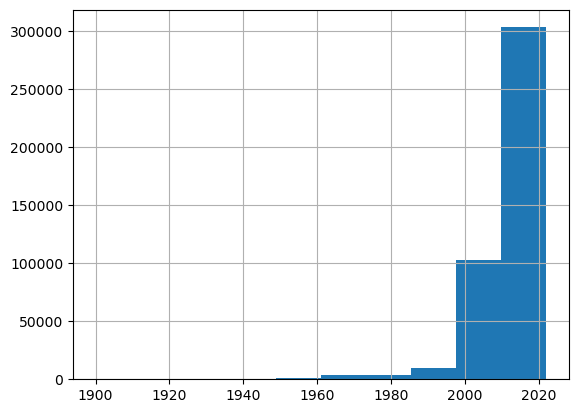

In [128]:
vehicles_df["year"].hist()

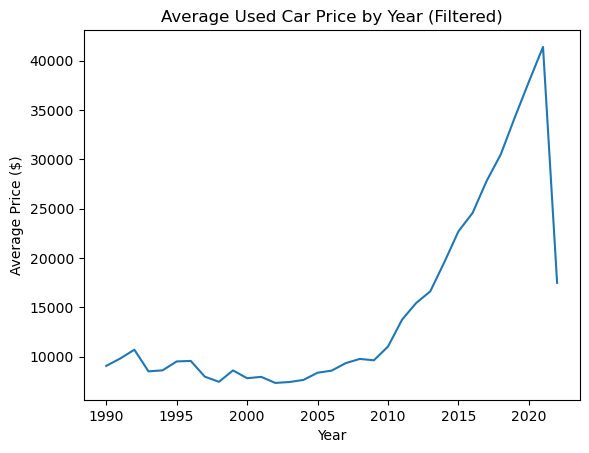

In [129]:
filtered_df = vehicles_df[(vehicles_df["price"] > 1000) & 
                          (vehicles_df["price"] < 100000) & 
                          (vehicles_df["year"] >= 1990) & 
                          (vehicles_df["year"] <= 2025)]

# Group and plot
filtered_df.groupby("year")["price"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.title("Average Used Car Price by Year (Filtered)")
plt.show()

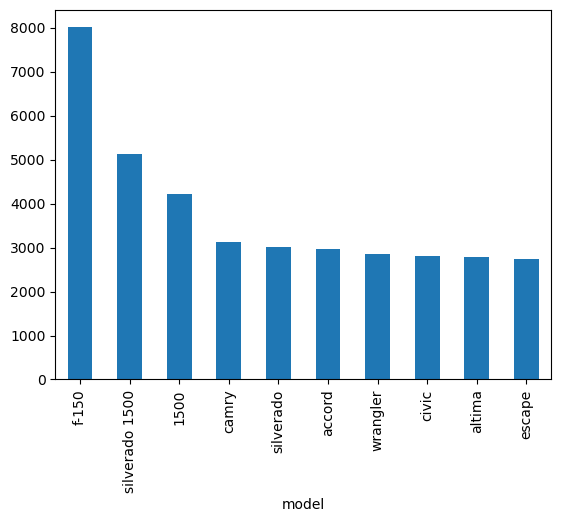

In [130]:
vehicles_df["model"].value_counts().nlargest(10).plot(kind='bar')

plt.show()

In [131]:
#vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts()
vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts().sort_values()

odometer
26892.0        1
121377.0       1
175859.0       1
92493.0        1
157748.0       1
            ... 
140000.0    1244
160000.0    1250
150000.0    1603
200000.0    1728
100000.0    2263
Name: count, Length: 104859, dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [133]:
#vehicles_df.drop(columns=["id", "VIN", "regionf"])
print(vehicles_df.columns)
vehicles_df.head()

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [134]:
#pip install category_encoders 

In [135]:
from category_encoders import JamesSteinEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [136]:


vehicles_df.head(10)

#Fill NaN with mode
print ("Fuel Mode : " + str(vehicles_df['fuel'].mode()[0]))
print (vehicles_df['fuel'].value_counts())
vehicles_df['fuel']=vehicles_df['fuel'].fillna(vehicles_df['fuel'].mode()[0])
vehicles_df['title_status']=vehicles_df['title_status'].fillna(vehicles_df['title_status'].mode()[0])
vehicles_df['transmission']=vehicles_df['transmission'].fillna(vehicles_df['transmission'].mode()[0])
vehicles_df['drive']=vehicles_df['drive'].fillna(vehicles_df['drive'].mode()[0])
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna(vehicles_df['paint_color'].mode()[0])
vehicles_df['condition'] = vehicles_df['condition'].fillna(vehicles_df['condition'].mode()[0])
vehicles_df['type']= vehicles_df['type'].fillna(vehicles_df['type'].mode()[0]) #should maybe drop
vehicles_df['fuel'].unique()
vehicles_df['fuel'].isna().sum()


#fill NaN with median].median()[0]) #should maybe drop

vehicles_df['odometer'] = vehicles_df['odometer'].fillna(vehicles_df['odometer'].median())
vehicles_df['year']= vehicles_df['year'].fillna(vehicles_df['year'].median())
#one hot WIP
#one_hot = OneHotEncoder()


vehicles_df.head()

Fuel Mode : gas
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,az
1,7218891961,fayetteville,11900,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,ar
2,7221797935,florida keys,21000,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,fl
3,7222270760,worcester / central MA,1500,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,ma
4,7210384030,greensboro,4900,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,nc


In [137]:
vehicles_df.head()
#vehicles_df['title_status'].unique()
vehicles_df = pd.get_dummies(vehicles_df, columns=['title_status'], prefix='title_status')
vehicles_df = pd.get_dummies(vehicles_df, columns=['transmission'], prefix='transmission')
vehicles_df = pd.get_dummies(vehicles_df, columns=['drive'], prefix='drive')

columns_to_encode = ['fuel', 'paint_color', 'type', 'condition', 'state', 'model', 'manufacturer'] #,

# Fill missing values first (you can do this in a pipeline too)
for col in columns_to_encode:
    vehicles_df[col] = vehicles_df[col].fillna('unknown')

# Fit and transform
js_encoder = JamesSteinEncoder(cols=columns_to_encode)
encoded_df = js_encoder.fit_transform(vehicles_df[columns_to_encode], vehicles_df['price'])

# Combine with rest of data
#vehicles_df = vehicles_df.drop(columns = ['region','cylinders','size','id','VIN'])
vehicles_df = vehicles_df.drop(columns = ['region','cylinders','size','id','VIN']) #try dropping model
vehicles_encoded = vehicles_df.drop(columns=columns_to_encode).join(encoded_df)


#cat_features = ['title_status','transmission']
#for col in cat_features:
#    vehicles_encoded[col] = vehicles_encoded[col].astype('category')

vehicles_encoded = vehicles_encoded[
    (vehicles_encoded['price'] >= 500) & 
    (vehicles_encoded['price'] <= 100_000)
]

vehicles_encoded = vehicles_encoded[(vehicles_encoded['odometer'] > 1000) & (vehicles_encoded['odometer'] < 300000)]
current_year = vehicles_encoded['year'].max()
# Calculate age, but set a minimum of 1 year to avoid division by zero
vehicle_age = (current_year - vehicles_encoded['year']).clip(lower=1)

# Now compute miles_per_year safely
vehicles_encoded['miles_per_year'] = vehicles_encoded['odometer'] / vehicle_age

In [138]:
vehicles_encoded['year'].describe()
vehicles_encoded['year'].value_counts()

year
2018.0    31217
2017.0    30895
2013.0    28221
2015.0    26740
2016.0    26378
          ...  
1918.0        1
1943.0        1
1921.0        1
1915.0        1
1905.0        1
Name: count, Length: 107, dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [140]:
#vehicles_encoded.head()
#vehicles_encoded.info()
#vehicles_encoded.info()
#vehicles_encoded['price'].describe()
vehicles_df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [141]:
X=vehicles_encoded.drop(columns=['price'])
y=vehicles_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y) #default 25% split
X_train_clean = X_train.astype(float)
X_test_clean = X_test.astype(float)

X_train_clean.head()

,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,...,drive_fwd,drive_rwd,fuel,paint_color,type,condition,state,model,manufacturer,miles_per_year
111205,2016.0,102123.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,73893.961556,87224.812304,93205.837892,71973.191117,17853.026003,7426.260962,19170.921642,17020.500000
260888,2018.0,13859.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,73893.961556,84485.144011,93205.837892,71973.191117,19041.976619,29854.247998,162562.299049,3464.750000
210607,2014.0,92000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,73893.961556,47070.555210,9234.113469,71973.191117,16037.325039,8258.051328,10443.035906,11500.000000
32994,2007.0,113232.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,73893.961556,182929.281281,39452.997712,71973.191117,94011.530858,152169.577720,112372.101954,7548.800000
115942,2008.0,155082.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,73893.961556,16403.286775,93205.837892,58232.769332,17853.026003,9723.903984,11083.353232,11077.285714


In [142]:

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lori_transformer', PolynomialFeatures(degree=2)),
    ('lori_regression', LinearRegression())
])

pipe.fit(X_train_clean, y_train)
train_mse = mean_squared_error(y_train, pipe.predict(X_train_clean))
test_mse = mean_squared_error(y_test, pipe.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")



model_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1))
])

#model_ridge.get_params()
#param_grid = {
#    'ridge__alpha': [.1,1,5],
#    'ridge__copy_X': [True, False],
#    'ridge__fit_intercept': [True, False],
#    'ridge__positive': [True, False]
#}

# RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], scoring='neg_root_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)


model_ridge.fit(X_train_clean, y_train)
predictions = model_ridge.predict(X_test)
train_mse = mean_squared_error(y_train, model_ridge.predict(X_train_clean))
test_mse = mean_squared_error(y_test, model_ridge.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, model_ridge.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

scores = cross_val_score(model_ridge, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores.mean())

result = permutation_importance(model_ridge, X_test_clean, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
print(importances.sort_values(ascending=False).head(10))

# Define Lasso model pipeline
lasso_model = Pipeline([
    ('scaler', StandardScaler()),            # Always good before regularization
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=1.0))              # Alpha controls regularization strength
])

lasso_model.fit(X_train_clean, y_train)
predictions = lasso_model.predict(X_test)
train_mse = mean_squared_error(y_train, lasso_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, lasso_model.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")


60099840.41393188
59265584.53907742
Train RMSE: $ 7752.41
Test RMSE: $ 7698.41
######################################### #########################################
Best alpha: 10.0
60100002.83237392
59264550.87825828
Train RMSE: $ 7752.42
Test RMSE: $ 7698.35
######################################### #########################################
Cross-validated RMSE: 7802.051412187633
year                  1.088743
miles_per_year        0.644792
model                 0.259565
odometer              0.117600
fuel                  0.105549
manufacturer          0.036125
drive_fwd             0.030729
transmission_other    0.010308
drive_4wd             0.009873
type                  0.007703
dtype: float64
60102557.99151285
59264811.02579338
Train RMSE: $ 7752.58
Test RMSE: $ 7698.36
######################################### #########################################


In [188]:
top_features = ['odometer', 'year','miles_per_year', 'fuel', 'model','manufacturer']

#top_features = ['miles_per_year', 'fuel', 'model']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), top_features)
])

simple_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1))  # or LinearRegression()
])

simple_model.fit(X_train_clean[top_features], y_train)
#preds = simple_model.predict(X_test[top_features])
#print("Simple model RMSE:", mean_squared_error(y_test, preds))

#predictions = model_ridge.predict(X_test)
train_mse = mean_squared_error(y_train, simple_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, simple_model.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, simple_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, simple_model.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

70128315.43034367
69892222.35870756
Train RMSE: $ 8374.27
Test RMSE: $ 8360.16
######################################### #########################################


In [144]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test_clean)

baseline_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Baseline RMSE: 14181.27


In [145]:
#Using Grid Search to find the best parameters

model_ridge.get_params()
#pipe.get_parms()
params = {
    'ridge__alpha': [0.1, 1, 10],
#    'poly__degree': [1, 2, 3] #Can me memory intensive for poly 3
}

grid = GridSearchCV(model_ridge, params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_clean, y_train)
print(grid.best_params_)

#result {'poly__degree': 2, 'ridge__alpha': 10} #sometimes the answer was 1, sometimes 10

{'ridge__alpha': 10}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

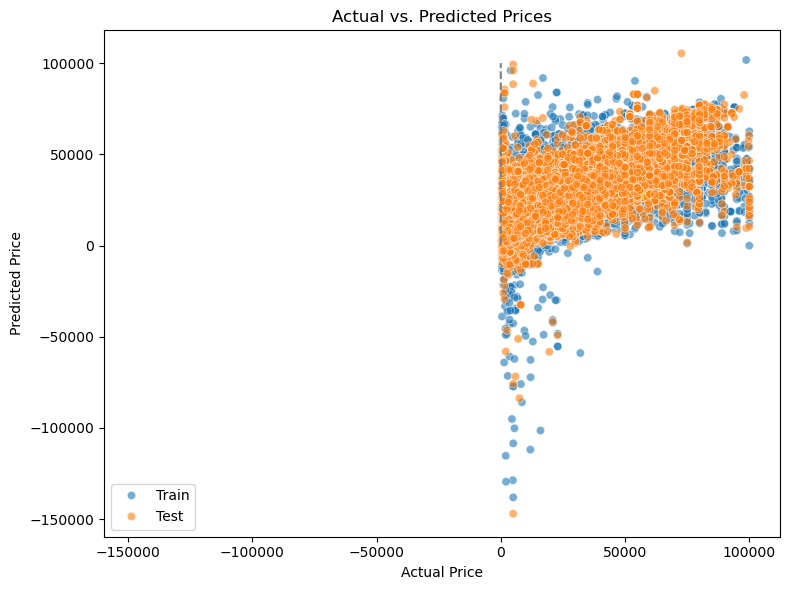

In [147]:
# Combine predictions and true values

train_preds = model_ridge.predict(X_train_clean)
test_preds = model_ridge.predict(X_test)

df_preds = pd.DataFrame({
    'Actual': vehicles_encoded["price"],
    'Predicted': pd.concat([pd.Series(train_preds, index=y_train.index),
                            pd.Series(test_preds, index=y_test.index)]),
    'Dataset': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})




plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_preds, x='Actual', y='Predicted', hue='Dataset', alpha=0.6)
plt.plot(predictions.min(), predictions.max(),
         [df_preds['Actual'].min(), df_preds['Actual'].max()],
         color='gray', linestyle='--')  # y = x reference line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.tight_layout()
plt.show()

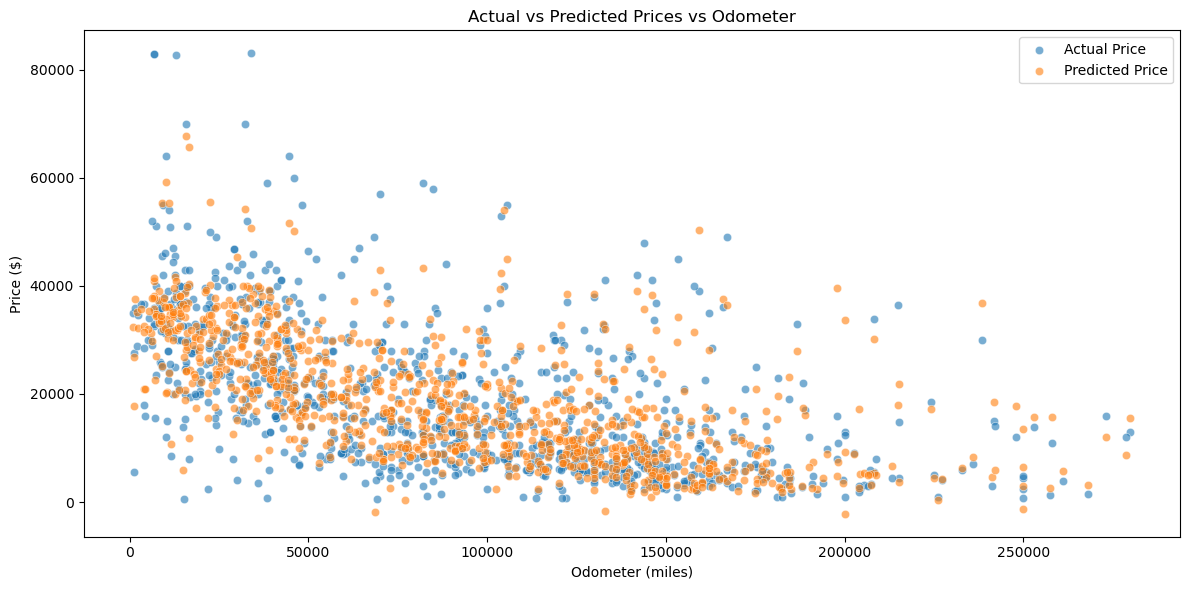

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = pd.DataFrame({
    'Actual Price': pd.concat([y_train, y_test]),
    'Predicted Price': pd.concat([pd.Series(train_preds, index=y_train.index),
                                  pd.Series(test_preds, index=y_test.index)]),
    'Odometer': pd.concat([X_train_clean['odometer'], X_test['odometer']]),
    'Year':pd.concat([X_train_clean['year'], X_test['year']])
}).sample(1000, random_state=42)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Odometer', y='Actual Price', label='Actual Price', alpha=0.6)
sns.scatterplot(data=plot_df, x='Odometer', y='Predicted Price', label='Predicted Price', alpha=0.6)
plt.title('Actual vs Predicted Prices vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

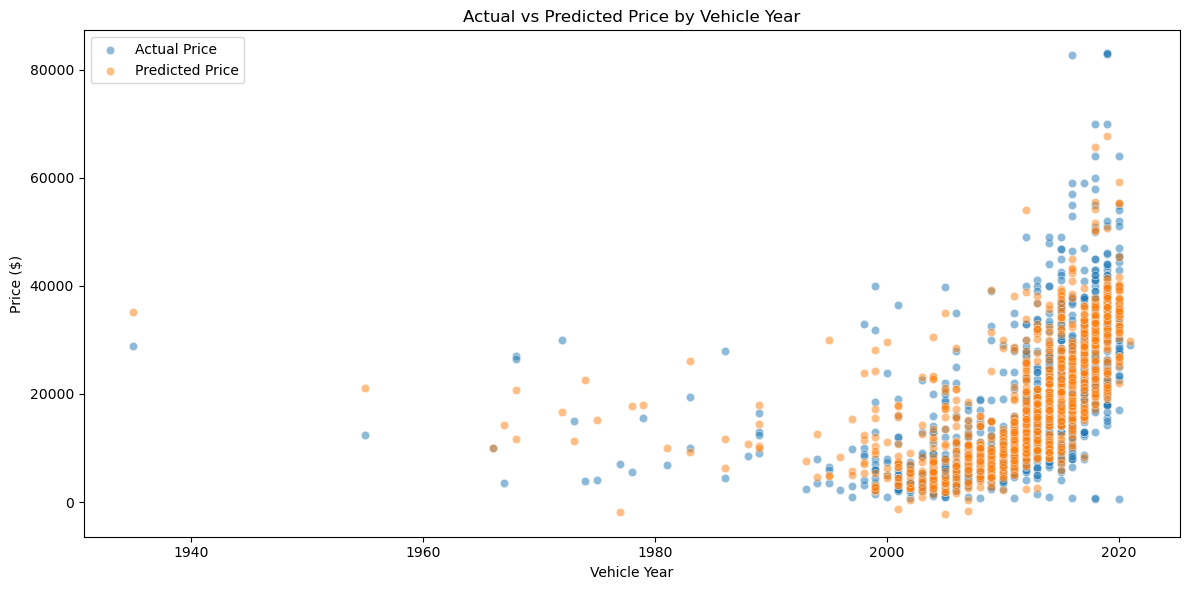

<Figure size 640x480 with 0 Axes>

In [149]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Year', y='Actual Price', label='Actual Price', alpha=0.5)
sns.scatterplot(data=plot_df, x='Year', y='Predicted Price', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Price by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('price_vs_year.png', dpi=300)  # You can change the filename and dpi as needed

After looking the data and seeing a lot of outliers, I've decide that I need to clip the data a bit more so that I can better predict the data.
I think the low should be 1000, and the high should be around 50,000 so that the predictions come out a bit better.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.